<a href="https://colab.research.google.com/github/EloizioHMD/Python_DS/blob/main/Decision_Tree_Regressor(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regressor (Competição de preços de moradia para usuários do Kaggle Learn)

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Notebook por [Eloízio Dantas](https://www.linkedin.com/in/eloiziohmdantas/).
Atividade proposta [Kaggle](https://www.kaggle.com/) no curso [Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning).

Este exercício testará sua capacidade de ler um arquivo de dados e entender as estatísticas sobre os dados. Em exercícios posteriores, você aplicará técnicas para filtrar os dados, construir um modelo de aprendizado de máquina e melhorar iterativamente seu modelo.

Os exemplos do curso usam dados de Melbourne. Para garantir que você possa aplicar essas técnicas por conta própria, será necessário aplicá-las a um novo conjunto de dados (com preços de imóveis de Iowa).

Como estaremos trabalhando com dados do Kaggle existem duas formas ou acessa-se o dataset e faz o download e carrega, ou para quem tem com lá acessa a api. Segue ai como fazer: [Como importar um dataset do Kaggle para o Google Colab](https://medium.com/@marcelmartinsbittar/como-importar-um-dataset-do-kaggle-para-o-google-colab-a79c47005e6d) feito pelo Marcel Bittar.

### Etapa 1 - Carregando os Dados

Leia o arquivo de dados de Iowa em um Pandas DataFrame, assim vamos deixar essa primeira área de códigos para inserir as bibiotecas.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

Carregar os arquivos para começar a trabalhar.

In [15]:
# Carregando arquivos para Pandas Dataframe
iowa_data = pd.read_csv('/content/drive/MyDrive/Awari/data_science/iowa_train.csv')

### Etapa 02 - Explorar os dados

In [16]:
iowa_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
iowa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
iowa_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


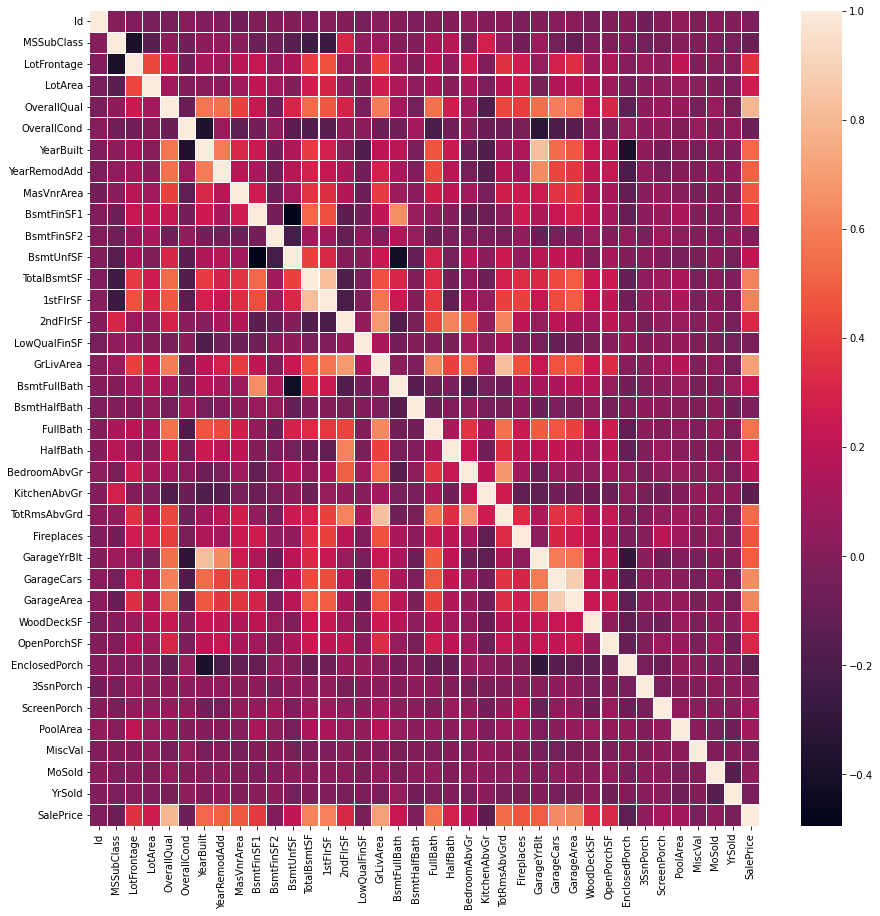

In [19]:
plt.figure(figsize = (15,15))

ax = sns.heatmap(iowa_data.corr(), linewidths=.1)

In [20]:
# imprime a lista de colunas no conjunto de dados para encontrar o nome do destino de previsão
print(iowa_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
# Qual é o tamanho médio do lote (arredondado para o número inteiro mais próximo)?
Media_area_lote =  iowa_data['LotArea'].mean().round()
print('Os lotes possuem tamanho médio de {} m^2'.format( Media_area_lote))

Os lotes possuem tamanho médio de 10517.0 m^2


In [22]:
# Quantos anos tem a casa mais nova (ano atual - a data em que foi construída)
Casa_nova = 2022 - iowa_data['YearBuilt'].max()
print('A casa mais tem {} ano(s).'.format(Casa_nova))

A casa mais tem 12 ano(s).


### Etapa 03 - Identificação dos elementos endogenos e exogenos da regressão.

Essa exemplo e a proposta desta atividade é prever o valor de venda de imóvel utilizando um algorítimo de Machine Learning e demais informações contidas no dataset. Assim, depois de conhecer o dataset e realizar os ajustes necessários a etapa seguinte é a de selecionar o alvo de previsão (endogeno) e as recursos de previsão (exogenos).

In [23]:
# Alvo de previsão
y = iowa_data['SalePrice']

Alguns recusos foram sugeridos no exercício. Porém, na exploração, fizemos um gráfico de mapa de calor para entender a correlação entre os dados, com base nele vou acrescentar outros recursos que podem contribuir.

In [24]:
# Recursos de Previsão
recursos = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GrLivArea', 'GarageArea']
X = iowa_data[recursos]

Vamos dar mais uma revisada nos dados, agora apenas os selecionados.

In [25]:
print(X.describe())

             LotArea    YearBuilt     1stFlrSF     2ndFlrSF     FullBath  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082  1971.267808  1162.626712   346.992466     1.565068   
std      9981.264932    30.202904   386.587738   436.528436     0.550916   
min      1300.000000  1872.000000   334.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   882.000000     0.000000     1.000000   
50%      9478.500000  1973.000000  1087.000000     0.000000     2.000000   
75%     11601.500000  2000.000000  1391.250000   728.000000     2.000000   
max    215245.000000  2010.000000  4692.000000  2065.000000     3.000000   

       BedroomAbvGr  TotRmsAbvGrd    GrLivArea   GarageArea  
count   1460.000000   1460.000000  1460.000000  1460.000000  
mean       2.866438      6.517808  1515.463699   472.980137  
std        0.815778      1.625393   525.480383   213.804841  
min        0.000000      2.000000   334.000000     0.000000  
25%  

In [26]:
print(X.head())

   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  GrLivArea  GarageArea  
0             8       1710         548  
1             6       1262         460  
2             6       1786         608  
3             7       1717         642  
4             9       2198         836  


### Etapa 04 - Especificação e Ajuste do Modelo.

Umas das bibliotecas mais importantes para Machine Learing é o scikit-learn. Para uma boa especificação de uma modelo são:

* **Defina:** Que tipo de modelo será? Uma árvore de decisão? Algum outro tipo de modelo? Alguns outros parâmetros do tipo de modelo também são especificados;
* **Ajuste:** capture padrões dos dados fornecidos. Este é o coração da modelagem;
* **Prever:** exatamente o que parece
* **Avaliar:** determine a precisão das previsões do modelo.

Para nosso exercício vamos utilizar o algorítimo de regressão por árvore de decisão. [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Decision Trees é um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino aprendendo regras de decisão simples inferidas a partir dos recursos de dados. Uma árvore pode ser vista como uma aproximação constante por partes. 

In [27]:
# Para reprodutibilidade do modelo, defina um valor numérico para random_state ao especificar o modelo
iowa_modelo = DecisionTreeRegressor(random_state=1)

# Ajute do modelo
iowa_modelo.fit(X,y)

# Contruindo previsões
previsoes = iowa_modelo.predict(X)

In [28]:
# Conferindo os resultados
print("Primeiras previsões na amostra:", iowa_modelo.predict(X.head()))
print("Valores de destino reais para essas casas:", y.head().tolist())

Primeiras previsões na amostra: [208500. 181500. 223500. 140000. 250000.]
Valores de destino reais para essas casas: [208500, 181500, 223500, 140000, 250000]


### Etapa 05 - Dividindo os dados

Você vai querer avaliar quase todos os modelos que você já construiu. Na maioria das aplicações (embora não em todas), a medida relevante da qualidade do modelo é a precisão preditiva. Em outras palavras, as previsões do modelo estarão próximas do que realmente acontece.

Para isso, vamos precisar dividir nossos dados em dados de treino e dados de test e assim conseguir realizar a precisão. A biblioteca scikit-learn tem uma função `train_test_split` para dividir os dados em duas partes.

In [29]:
# from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [30]:
# Especificando o modelo
iowa_modelo = DecisionTreeRegressor(random_state=1)

# Ajustando iowa_modelo com os dados de treino.
iowa_modelo.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [31]:
# Prever com todas as observações de validação
val_previsoes = iowa_modelo.predict(val_X)

In [32]:
# Conferindo os resultados da Validação
print('Top previsões de validação:', iowa_modelo.predict(val_X.head()))
print('Top preços reais dos dados de validação', y.head().tolist())

Top previsões de validação: [179000. 141000. 114500.  92000. 142000.]
Top preços reais dos dados de validação [208500, 181500, 223500, 140000, 250000]


### Etapa 06 - Calcular o erro médio absoluto (MAE) nos dados de validação

Existem muitas métricas para resumir a qualidade do modelo, mas começaremos com uma chamada Erro Médio Absoluto, também chamada MAE. Podemos calcular o MAE com o Scikit-learn.


In [33]:
# Importando a função do scikit-learn
from sklearn.metrics import mean_absolute_error

# Calculando o MEA
val_mae = mean_absolute_error(val_y, val_previsoes)
val_mae

29820.235616438356

Acho que temos um erro bem alto aqui. Você pode ver na documentação do scikit-learn que o modelo de árvore de decisão tem muitas opções (mais do que você deseja ou precisa por um longo tempo). As opções mais importantes determinam a profundidade da árvore.

Na próxima etapa vamos ver como melhorar esse modelo.

## Etapa 07 - Otimizando o modelo

O modelo que escrevemos de árvore é bem rasa, podemos melhorar essa profundidade. Porém, importante não perder de vista os conceitos de overfitting e underfitting.

* Overfitting: captura de padrões espúrios que não se repetirão no futuro, levando a previsões menos precisas;
* Underfitting: falha na captura de padrões relevantes, novamente levando a previsões menos precisas.

Podemos usar uma função de utilitário para ajudar a comparar as pontuações MAE de diferentes valores para max_leaf_nodes.



In [34]:
# Função para obter o erro absoluto em diversas profundidades
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    modelo = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    modelo.fit(train_X, train_y)
    prevs_val = modelo.predict(val_X)
    mae = mean_absolute_error(val_y, prevs_val)
    return(mae)

In [38]:
candidato_max_leaf_nodes = [5, 25, 50, 75, 100, 250, 500]

In [39]:
# Loop para testar os valores de max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidato_max_leaf_nodes}
melhor_tree_size = min(scores, key=scores.get)
melhor_tree_size

50

Você sabe o melhor tamanho de árvore. **Se você fosse implantar esse modelo na prática, você o tornaria ainda mais preciso usando todos os dados e mantendo esse tamanho de árvore.** Ou seja, você não precisa manter os dados de validação agora que tomou todas as suas decisões de modelagem.

In [45]:
# Modelo final conforme a otimização
modelo_final = DecisionTreeRegressor(max_leaf_nodes=melhor_tree_size, random_state=1)
modelo_final.fit(X,y)
prev_X = modelo_final.predict(X)
MAE = mean_absolute_error(y, prev_X)

print("Previsões:", modelo_final.predict(X.head()))
print("Valores reais:", y.head().tolist())
print("MAE:", MAE)


Previsões: [183709.17910448 148429.25388601 220439.20338983 129965.51724138
 275223.6       ]
Valores reais: [208500, 181500, 223500, 140000, 250000]
MAE: 19864.39253305112


In [57]:
otimizacao =  ((val_mae - MAE)/val_mae * 100).round()
print('Melhora de ', otimizacao, '% após o ajuste do modelo')

Melhora de  33.0 % após o ajuste do modelo
